1\. Write a function that converts number representation (bin<->dec<->hex)

In [46]:
# This converts any integer to a representation according to a list of symbols 'base' and stores it in 'result'
def to_base(number, base, result):
    size = len(base)
    if number < 0:
        result.append("-")
        number *= -1
    if number >= size:
        to_base(number / size, base, result)
    result.append(base[int(number % size)])


# Some examples
arr = []
operands = [8, -15, 1234, -14100]
bases = {"bin": "01", "dec": "0123456789", "hex": "0123456789ABCDEF"}
for num in operands:
    for key, value in bases.items():
        to_base(num, value, arr)
        print(num, "to base", key, "->", end=" ")
        print(*arr, sep="")
        arr.clear()

8 to base bin -> 1000
8 to base dec -> 8
8 to base hex -> 8
-15 to base bin -> -1111
-15 to base dec -> -15
-15 to base hex -> -F
1234 to base bin -> 10011010010
1234 to base dec -> 1234
1234 to base hex -> 4D2
-14100 to base bin -> -11011100010100
-14100 to base dec -> -14100
-14100 to base hex -> -3714


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various
bits as sign, mantissa and exponent)

In [47]:
# A 32-bit word is a string of 2 to 4 chars, because each char occupies 1 to 2 bytes in memory.
# In particular, the ascii chars occupy 1 byte, while some utf-8 chars occupy 2 bytes or even 6 bytes.
# To convert the word bits into a floating point we need to access the raw bytes via bytearray() and check that it's
#   indeed a 32-bit word.
def word_to_float(word):
    bin_arr = 0
    byte_array = bytearray(word, 'utf-8')
    if len(byte_array) != 4:
        return 0
    for i in range(len(byte_array)):
        bin_arr += byte_array[i]
        if i != len(byte_array) - 1:
            bin_arr = bin_arr << 8
    sign = bin_arr >> 31
    print("\tSign:", format(sign, '01b'), "=>", (sign == 1) * "-" + (sign == 0) * "+")
    exponent = (bin_arr >> 23) & ~(1 << 8)
    print("\tExponent:", format(exponent, '08b'), "=>", exponent - 127)
    mantissa = bin_arr & ~((2 ** 9 - 1) << 23)
    print("\tMantissa:", format(mantissa, '023b'), "=>", end= " ")
    mantissa_bin = []
    to_base(mantissa, "01", mantissa_bin)
    mantissa = 1.0
    for element, i in zip(mantissa_bin, range(-1,-23,-1)):
        mantissa += (element == '1') * (2 ** i)
    print(mantissa)
    return ((sign == 0) - (sign == 1)) * mantissa * (2 ** (exponent - 127))


# Run word_to_float on several examples
for example in ["Anda", " oh!", "ññ", "🐒", "⚠️"]:
    print("Converting", "'", example, "'", "into a float.\n\tWord bits: ", end="")
    for plot in bytearray(example, 'utf-8'):
        print(format(plot, '08b'), end=" ")
    print()
    w_to_f = word_to_float(example)
    if w_to_f == 0:
        print("Couldn't convert '", example, "' into a float. Size is not 32 bits.", end="\n\n")
    else:
        print("'", example,"' bits into a float =>", w_to_f, end="\n\n")

Converting ' Anda ' into a float.
	Word bits: 01000001 01101110 01100100 01100001 
	Sign: 0 => +
	Exponent: 10000010 => 3
	Mantissa: 11011100110010001100001 => 1.8624382019042969
' Anda ' bits into a float => 14.899505615234375

Converting '  oh! ' into a float.
	Word bits: 00100000 01101111 01101000 00100001 
	Sign: 0 => +
	Exponent: 01000000 => -63
	Mantissa: 11011110110100000100001 => 1.8703651428222656
'  oh! ' bits into a float => 2.0278539511890612e-19

Converting ' ññ ' into a float.
	Word bits: 11000011 10110001 11000011 10110001 
	Sign: 1 => -
	Exponent: 10000111 => 8
	Mantissa: 01100011100001110110001 => 1.777569055557251
' ññ ' bits into a float => -455.05767822265625

Converting ' 🐒 ' into a float.
	Word bits: 11110000 10011111 10010000 10010010 
	Sign: 1 => -
	Exponent: 11100001 => 98
	Mantissa: 00111111001000010010010 => 1.9863977432250977
' 🐒 ' bits into a float => -6.2951457287282384e+29

Converting ' ⚠️ ' into a float.
	Word bits: 11100010 10011010 10100000 11101111 10

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [48]:
maxf = 1.0
minf = 1.0
overflow = False
underflow = False
while not (overflow and underflow):
    if not overflow:
        maxf *= 2
        if maxf * 2 == float('inf'):
            print("Max float:", maxf)
            overflow = True
    if not underflow:
        minf /= 2
        if minf / 2 == float(0):
            print("Min float:", minf)
            underflow = True

Max float: 8.98846567431158e+307
Min float: 5e-324


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [49]:
testf = 1.0
addf = 1.0
while True:
    testf, addf = testf + addf, addf / 2
    if testf + addf == testf:
        print("Precision is:", addf * 2)
        break

Precision is: 2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the
quadratic equation $ax^2+bx+c=0$ using the standard formula:
$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again
find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [50]:
def sqrts(a, b, c):
    root = (b ** 2.0 - 4.0 * a * c) ** 0.5
    return [(-b + root) / (2 * a), (-b - root) / (2 * a)]


def sqrts_2(a, b, c):
    root = (b ** 2.0 - 4.0 * a * c) ** 0.5
    return [(b ** 2 - root ** 2) / (2 * a * (-b - root)), (b ** 2 - root ** 2) / (2 * a * (-b + root))]


def stable_sqrt(a, b, c):
    x1 = (-b + ((b < 0) - (b > 0)) * (b ** 2.0 - 4.0 * a * c) ** 0.5) / (2 * a)
    x2 = c / (a * x1)
    return [x2, x1]


print("a)", sqrts(0.001, 1000, 0.001))
print("b)", sqrts_2(0.001, 1000, 0.001))
print("c)", stable_sqrt(0.001, 1000, 0.001))
print("The error on the first root is due to the size difference between the factors that causes problems in the",
      "difference operation. With the separation of the computation in c) we avoid that difference, always summing the",
      "factors.")

a) [-9.999894245993346e-07, -999999.999999]
b) [-9.999785106639132e-07, -999989.0859481583]
c) [-1.000000000001e-06, -999999.999999]
The error on the first root is due to the size difference between the factors that causes problems in the difference operation. With the separation of the computation in c) we avoid that difference, always summing the factors.


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [51]:
import math as m
import matplotlib.pyplot as plt
plt.style.use('dark_background')


def foo(x):
    return x * (x - 1)


def derivative(function, point, precision):
    return (function(point + precision) - function(point)) / precision


Derivate at x = 1 with p = 1e-02:	1.010000000000001
Derivate at x = 1 with p = 1e-04:	1.0000999999998899
Derivate at x = 1 with p = 1e-06:	1.0000009999177333
Derivate at x = 1 with p = 1e-08:	1.0000000039225287
Derivate at x = 1 with p = 1e-10:	1.000000082840371
Derivate at x = 1 with p = 1e-12:	1.0000889005833413


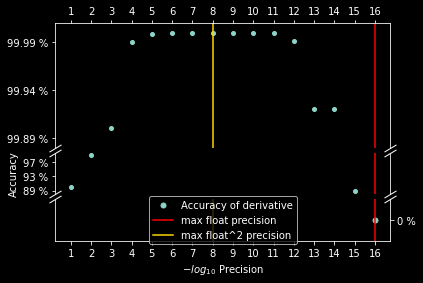

In [52]:
acc = []
for p in range(1, 17, 1):
    der_f = derivative(foo, 1.0, 10.0 ** -p)
    if p == 2 or p == 4 or p == 6 or p == 8 or p == 10 or p == 12:
        print(f"Derivate at x = 1 with p = {10 ** -p:.0e}:\t{der_f}")
    #print(f"Accuracy at x = 1 with p = {10 ** -p:.0e}:\t{(1 - m.fabs(result - 1)) * 100:.5f}%")
    acc.append((1 - abs(der_f - 1)) * 100)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})
fig.subplots_adjust(hspace=0.075)  # adjust space between axes
ax1.plot(range(3, 15, 1), acc[2:14:1], 'o', markersize=4, label="Accuracy of derivative")
ax2.plot([1, 2, 15], [acc[0],acc[1],acc[14]], 'o', markersize=4, label="Accuracy of derivative")
ax3.plot(16, acc[15], 'o', markersize=5, label="Accuracy of derivative")
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(99.88, 100.01)   # most of the data
ax3.set_ylim(-0.5, 0.5) # outlier
ax2.set_ylim(88, 99.5)    # outlier
# hide the spines between ax and ax3
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax3.spines.top.set_visible(False)
# ticks top ax1 and bottom ax3 only
ax1.tick_params(labeltop=True)
ax1.xaxis.tick_top()
ax2.xaxis.set_visible(False)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_right()
plt.xlabel("$-log_{10}$ Precision")
ax2.set_ylabel("Accuracy")
plt.setp(ax1, yticks=[x / 100 for x in range(9989, 10000, 5)],
         yticklabels=[str(x / 100) + " %" for x in range(9989, 10000, 5)])
plt.setp(ax2, yticks=[x for x in range(89, 99, 4)], yticklabels=[str(x) + " %" for x in range(89, 99, 4)])
plt.setp(ax3, yticks=[0], yticklabels=["0 %"])
ax1.axvline(x=16, color="red", label="max float precision")
ax1.axvline(x=8, color="gold", label="max float^2 precision")
#ax1.axhline(y=100+1e-16, markersize=1)
ax2.axvline(x=16, color="red", label="max float precision")
ax3.axvline(x=16, color="red", label="max float precision")
ax3.axvline(x=8, color="gold", label="max float^2 precision")
plt.xticks(range(1, 17, 1))
d = .6  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='white', mec='white', mew=1, clip_on=False)
ax1.plot([0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [0, 1], [1, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)
ax3.legend(loc="center")
plt.show()


The numeric derivate is not exactly the analytic one, because floating points do not have infinite precision.

We see that accuracy caps for $10^{-8}$, this is because if $x < 10^{-8}$, the sums using $x^2$ won't add up.
In particular, we see that accuracy plummets as we go approach the floating point precision: at that point, no sums
   add up.


7\. Consider the integral of the semicircle of radius 1:
$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [53]:
def riemann(limits, steps):
    integral = 0.0
    domain_point = limits[0]
    domain_step = (limits[1] - limits[0]) / steps
    for i in range(steps):
        integral += m.sqrt(1.0 - domain_point ** 2.0)
        domain_point += domain_step
    return 2 * integral / steps

Riemann for n = 1e+02:	1.5691342555492493
Accuracy for n = 1e+02:	 99.8941892581937338 %
Riemann for n = 1e+03:	1.5707437385010707
Accuracy for n = 1e+03:	 99.9966521252355420 %
Riemann for n = 1e+04:	1.5707946637153933
Accuracy for n = 1e+04:	 99.9998941250705258 %
Riemann for n = 1e+05:	1.5707962742024018
Accuracy for n = 1e+05:	 99.9999966518577992 %
Riemann for n = 1e+06:	1.5707963251473536
Accuracy for n = 1e+06:	 99.9999998951141578 %
Riemann for n = 1e+07:	1.5707963267013612
Accuracy for n = 1e+07:	 99.9999999940453534 %
Riemann for n = 1e+08:	1.5707963274583725
Accuracy for n = 1e+08:	 99.9999999577618155 %
Accuracy increase from 10^6 to 10^8: 6.264766483354833e-08 %


'\nfig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={\'height_ratios\': [3, 1]})\nfig.subplots_adjust(hspace=0.075)  # adjust space between axes\nax1.plot(step_vector[2:], acc_results[2:], \'o\', markersize=4, label=\'Accuracy vs N\')\nax2.plot(step_vector[0], acc_results[0], \'o\', markersize=4, label=\'Accuracy vs N\')\nplt.xscale(\'log\')\n# zoom-in / limit the view to different portions of the data\nax1.set_ylim(99.99988, 100.00001)   # most of the data\nax2.set_ylim(99,89, 99,90) # outlier\n# hide the spines between ax and ax2\nax1.spines.bottom.set_visible(False)\nax2.spines.top.set_visible(False)\n# ticks top ax1 and bottom ax3 only\nax1.tick_params(labeltop=True)\nax1.xaxis.tick_top()\nax3.xaxis.tick_bottom()\nplt.xlabel("Steps")\nax1.set_ylabel("Accuracy")\nd = .6  # proportion of vertical to horizontal extent of the slanted line\nkwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,\n              linestyle="none", color=\'white\', mec=\'white\', mew=1, clip_on

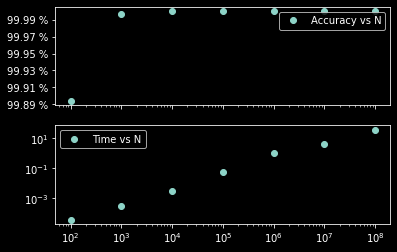

In [54]:
import time


n = 100
acc_results = []
step_vector = []
runtime = []
while n < 10 ** 9:
    step_vector.append(n)
    start_time = time.time()
    I = riemann((-1, 1), n)
    runtime.append(time.time() - start_time)
    print(f"Riemann for {n = :.0e}:\t{I}")
    acc = (1 - m.fabs(I - m.pi / 2) / (m.pi / 2)) * 100
    print(f"Accuracy for {n = :.0e}:\t", format(acc, ".16f"), "%")
    acc_results.append(acc)
    n *= 10
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(step_vector, acc_results, 'o', label="Accuracy vs N")
plt.setp(ax1, yticks=[x / 100 for x in range(9989, 10001, 2)],
         yticklabels=[str(x/100) + " %" for x in range(9989, 10001, 2)])
ax2.plot(step_vector, runtime, 'o', label="Time vs N")
plt.setp(ax2, yticks=[x for x in range(0, 31, 1)],
         yticklabels=[str(x) + " %" for x in range(0, 31, 1)])
ax1.legend()
ax2.legend()
plt.yscale('log')
plt.xscale('log')
acc_inc = 100 * (acc_results[-1] / (acc_results[4]) - 1)
print("Accuracy increase from 10^6 to 10^8:", acc_inc, "%")
"""
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.075)  # adjust space between axes
ax1.plot(step_vector[2:], acc_results[2:], 'o', markersize=4, label='Accuracy vs N')
ax2.plot(step_vector[0], acc_results[0], 'o', markersize=4, label='Accuracy vs N')
plt.xscale('log')
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(99.99988, 100.00001)   # most of the data
ax2.set_ylim(99,89, 99,90) # outlier
# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# ticks top ax1 and bottom ax3 only
ax1.tick_params(labeltop=True)
ax1.xaxis.tick_top()
ax3.xaxis.tick_bottom()
plt.xlabel("Steps")
ax1.set_ylabel("Accuracy")
d = .6  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='white', mec='white', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.setp(ax1, yticks=[x / 100000 for x in range(9999999, 10000001, 2)],
         yticklabels=[str(x/100000) + " %" for x in range(9999999, 10000001, 2)])
plt.setp(ax2, yticks=[step_vector[0]], yticklabels=[str(format(acc_results[0], ".5f")) + " %"])
ax1.legend(loc="upper left")
"""

a) We see that $N=100$ has an accuracy of $99,89\%$.

b) With $N=10^6$ we have close to a second of runtime. And with a minute of runtime, i.e., $N=10^8$,
our accuracy is pretty much the same, even with an increase of two
orders of magnitude, we only gained a $10^{-8}\%$ factor in accuracy.